<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/COMP_4980_W2022_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)

In [ ]:
import csv
import io
import sys
from google.colab import files

In [ ]:
file = files.upload()

Saving emails.csv to emails.csv


In [ ]:
df = pd.read_csv( io.StringIO(file['emails.csv'].decode('utf-8')) )
df.shape

(5728, 2)

In [ ]:
# not very useful for this data set
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.head(20)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['text']

vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(corpus)

In [ ]:
X.shape

(5728, 36996)

In [ ]:
X.count_nonzero() / (5728 * 37303)

0.0023794413392844976

In [ ]:
#X.toarray()[:20]
print(X[0])

  (0, 343)	1
  (0, 4206)	1
  (0, 4338)	1
  (0, 5740)	1
  (0, 6385)	1
  (0, 7106)	1
  (0, 7345)	1
  (0, 7477)	2
  (0, 7986)	1
  (0, 8275)	1
  (0, 8278)	1
  (0, 8594)	1
  (0, 8769)	1
  (0, 9015)	1
  (0, 9223)	3
  (0, 9743)	2
  (0, 9837)	1
  (0, 9986)	1
  (0, 10221)	1
  (0, 10777)	1
  (0, 11867)	1
  (0, 12207)	1
  (0, 12539)	1
  (0, 12552)	1
  (0, 12742)	2
  :	:
  (0, 26421)	1
  (0, 26835)	1
  (0, 26937)	2
  (0, 26957)	1
  (0, 27059)	1
  (0, 27060)	1
  (0, 27817)	1
  (0, 27941)	1
  (0, 28097)	1
  (0, 28710)	1
  (0, 29690)	1
  (0, 30592)	1
  (0, 31356)	1
  (0, 31767)	1
  (0, 31776)	1
  (0, 32070)	1
  (0, 32126)	1
  (0, 32145)	1
  (0, 32408)	1
  (0, 32423)	1
  (0, 32839)	1
  (0, 34582)	1
  (0, 34814)	1
  (0, 35805)	2
  (0, 36333)	1


In [ ]:
sortVocab = sorted(vectorizer.vocabulary_.items(), 
                   #reverse=True,
                   key = lambda x : x[1])

In [ ]:
from numpy.ma.core import sort
print(sortVocab[35805])

('website', 35805)


In [ ]:
from sklearn.model_selection import train_test_split
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#clf = LogisticRegression(max_iter=1000)
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
clf.coef_[:,:20]

array([[-2.73401485e-01,  3.03313502e-01,  6.85217478e-04,
        -4.00438940e-07, -9.73216966e-06, -5.72536704e-07,
        -3.97945152e-03, -1.42267396e-05, -1.43356221e-05,
        -1.12229378e-05, -1.12818773e-05, -2.15819307e-05,
        -2.05763675e-05,  0.00000000e+00, -2.23906362e-05,
         0.00000000e+00, -2.08691484e-05, -4.73981823e-03,
         7.62181976e-09, -2.04578821e-05]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[857   9]
 [ 98 182]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       866
           1       0.95      0.65      0.77       280

    accuracy                           0.91      1146
   macro avg       0.93      0.82      0.86      1146
weighted avg       0.91      0.91      0.90      1146



In [ ]:
n = len(df['spam'])

for i in range(n):
   if clf.predict(X[i])[0] != y[i]:
     print(y[i], ": ", corpus[i])

1 :  Subject: security alert - confirm your national credit union information  - - > 
1 :  Subject: help  television in 1919 by seat to my knoweledge . chrono cross in 1969
1 :  Subject: reduction in high blood pressure  age should be nothing more than a number  it ' s okay to want to hold on to your young body as long as you can  view more about a new  lifespan enhancement press here  with increasing longevity for an increasing segment of the  population , this is the frontier for the new millennium  - dr david howard  medical journal news  sorry not for me and the address is above  this was good reasoning , but the rash youth had no idea he was speeding  over the ocean , or that he was destined to arrive shortly at the barbarous  island of brava , off the coast of africa  yet such was the case ; just as the sun sank over the edge of the waves he  saw , to his great relief , a large island directly in his path  he dropped to a lower position in the air , and when he judged himself to 

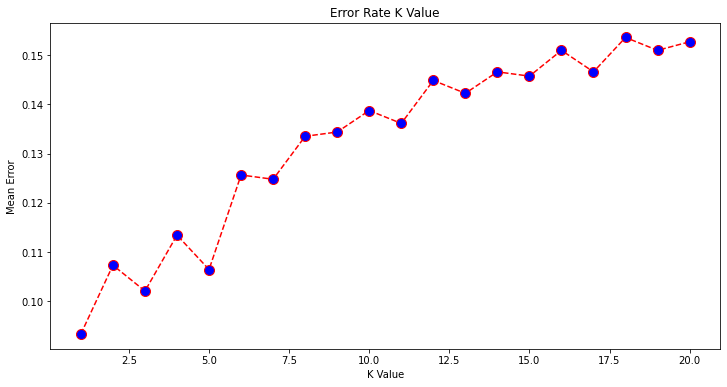

In [ ]:
error = []

# Calculating error for K values between 1 and 21
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)#, metric='manhattan' )
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
wordCoefs = {}
nWords = len(clf.coef_[0])

for i in range(nWords):
  if clf.coef_[0,i] > 0:
    wordCoefs[ sortVocab[i] ] = clf.coef_[0,i]

for item in wordCoefs:
  print("{}: {}".format(item,wordCoefs[item]))

In [ ]:
sortedWords = sorted(wordCoefs.items(), key=lambda x: x[1], reverse=False)

for i in range(20):
  print(sortedWords[i])

(('awkward', 5841), 5.789667043417111e-11)
(('bblop', 6195), 1.0339425674088827e-10)
(('thinker', 33299), 2.306190675333811e-10)
(('carve', 7914), 3.0197537263651684e-10)
(('versed', 35165), 3.4339969868788784e-10)
(('3945', 1778), 4.261867947043748e-10)
(('574', 2375), 4.261867947043748e-10)
(('geophysicists', 15675), 4.261867947043748e-10)
(('holden', 17095), 7.253478093602236e-10)
(('amram', 4755), 8.211513878374132e-10)
(('breineck', 7145), 8.211513878374132e-10)
(('cartels', 7902), 8.211513878374132e-10)
(('hammers', 16461), 8.211513878374132e-10)
(('mechanically', 21888), 8.211513878374132e-10)
(('monkeys', 22651), 8.211513878374132e-10)
(('parsimonious', 25039), 8.211513878374132e-10)
(('texts', 33170), 8.211513878374132e-10)
(('assistantship', 5476), 8.451211182232062e-10)
(('assurances', 5502), 8.451211182232062e-10)
(('grandmother', 16071), 8.451211182232062e-10)
